In [25]:
import rasterio
from skimage.feature import graycomatrix, graycoprops
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [31]:
def calculate_texture_features(image_path, band_number):
    with rasterio.open(image_path) as src:
        band = src.read(band_number)

    # 将波段数据转换为8位灰度图像
    band_scaled = cv2.normalize(band, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # 初始化纹理特征图
    contrast_map = np.zeros_like(band_scaled, dtype=np.float32)
    dissimilarity_map = np.zeros_like(band_scaled, dtype=np.float32)
    homogeneity_map = np.zeros_like(band_scaled, dtype=np.float32)
    energy_map = np.zeros_like(band_scaled, dtype=np.float32)
    correlation_map = np.zeros_like(band_scaled, dtype=np.float32)

    # 定义窗口大小
    window_size = 3
    offset = window_size // 2

    # 对每个像素计算纹理特征
    for i in range(offset, band_scaled.shape[0] - offset):
        for j in range(offset, band_scaled.shape[1] - offset):
            window = band_scaled[i-offset:i+offset+1, j-offset:j+offset+1]
            glcm = graycomatrix(window, [1], [np.pi/4, 3*np.pi/4], 256, symmetric=True, normed=True)
            
            contrast_map[i, j] = graycoprops(glcm, 'contrast')[0, 0]
            dissimilarity_map[i, j] = graycoprops(glcm, 'dissimilarity')[0, 0]
            homogeneity_map[i, j] = graycoprops(glcm, 'homogeneity')[0, 0]
            energy_map[i, j] = graycoprops(glcm, 'energy')[0, 0]
            correlation_map[i, j] = graycoprops(glcm, 'correlation')[0, 0]

    return contrast_map, dissimilarity_map, homogeneity_map, energy_map, correlation_map


In [32]:
image_path = r'D:\ArcGISProjects\workspace\shbyq\dy_bands14_pca.tif'

In [33]:

# 使用下载的Sentinel-2图像
texture_maps = calculate_texture_features(image_path, 1)

In [21]:
texture_maps.shape

(6787, 7027)

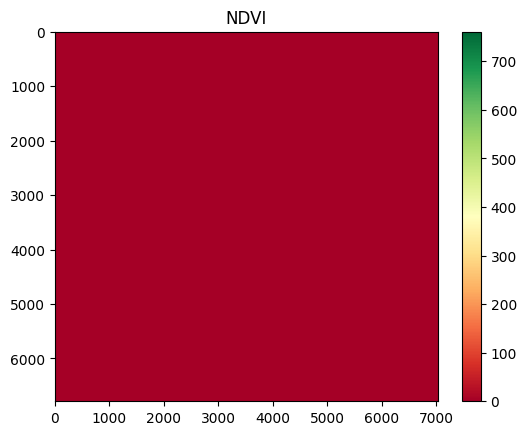

In [26]:
# 可视化NDVI
plt.imshow(texture_maps, cmap='RdYlGn')
plt.colorbar()
plt.title('texture')
plt.show()